In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.drop('User ID',axis=1,inplace=True)

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [ ]:
df.shape

(400, 4)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 3), (120, 3))

Applying StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(data=X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_scaled,columns=X_train.columns)

In [ ]:
np.round(X_train.describe(),2)

,Gender,Age,EstimatedSalary
count,280.0,280.00,280.00
mean,0.5,37.86,69807.14
std,0.5,10.22,34641.20
min,0.0,18.00,15000.00
25%,0.0,30.00,43000.00
50%,1.0,37.00,70500.00
75%,1.0,46.00,88000.00
max,1.0,60.00,150000.00


In [ ]:
np.round(X_train_scaled.describe(),2)

,Gender,Age,EstimatedSalary
count,280.00,280.00,280.00
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.01,-1.95,-1.58
25%,-1.01,-0.77,-0.78
50%,0.99,-0.08,0.02
75%,0.99,0.80,0.53
max,0.99,2.17,2.32


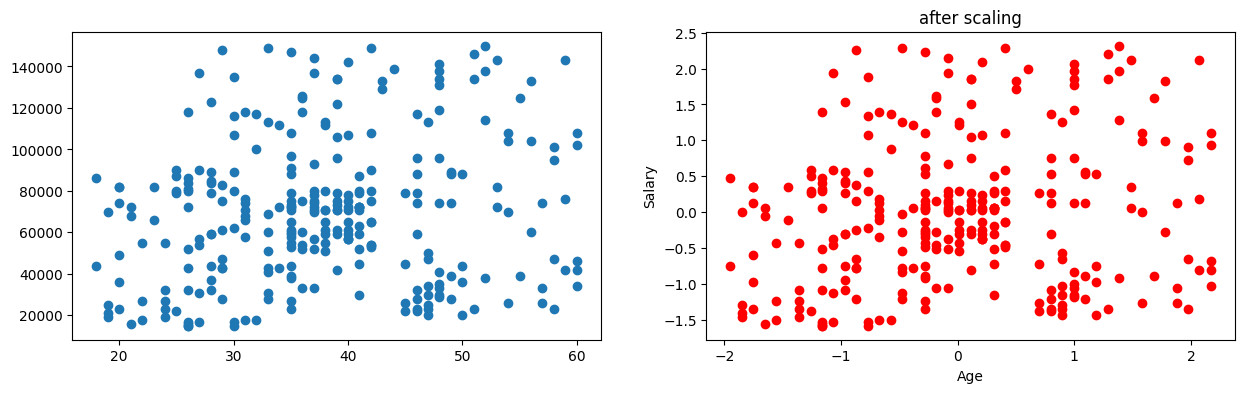

In [ ]:
fig,(x1,x2) = plt.subplots(1,2,figsize=(15,4))
x1.scatter(X_train['Age'],X_train['EstimatedSalary'])
plt.title("before")
plt.xlabel("Age")
plt.ylabel('Salary')
x2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
plt.title('after scaling')
plt.xlabel("Age")
plt.ylabel('Salary')
plt.show()